In [87]:
import pandas as pd 
import plotnine as plt
from datetime import datetime
import numpy as np
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [88]:
df_berlin = pd.read_csv("ds105 data/depFlight_0320/berlin_0320.csv")
df_berlin

,id,depFlight_id,depFlight_origin.name,depFlight_origin.displayCode,depFlight_destination.name,depFlight_destination.displayCode,depFlight_durationInMinutes,depFlight_departure,depFlight_arrival,depFlight_name,...,booking_agent,is_carrier,rating_status,rating,rating_breakdown.reliable_prices,rating_breakdown.clear_extra_fees,rating_breakdown.customer_service,rating_breakdown.ease_of_booking,rating_breakdown.other,price_amount
0,13465-2306021325--32480-0-9828-2306021605,13465-2306021325--32480-0-9828-2306021605,London City,LCY,Berlin Brandenburg,BER,100,2023-06-02T13:25:00,2023-06-02T16:05:00,British Airways,...,Worldairfares,False,available,3.21,2.750392,4.190264,4.950428,3.908032,2.035024,111.52
1,13542-2306020640--32356-0-9828-2306020940,13542-2306020640--32356-0-9828-2306020940,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-06-02T06:40:00,2023-06-02T09:40:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,103.99
2,13542-2306020845--32356-0-9828-2306021145,13542-2306020845--32356-0-9828-2306021145,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-06-02T08:45:00,2023-06-02T11:45:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,165.99
3,13465-2306020825--32480-0-9828-2306021110,13465-2306020825--32480-0-9828-2306021110,London City,LCY,Berlin Brandenburg,BER,105,2023-06-02T08:25:00,2023-06-02T11:10:00,British Airways,...,Worldairfares,False,available,3.21,2.750392,4.190264,4.950428,3.908032,2.035024,118.52
4,13554-2306020650--32480-0-9828-2306020940,13554-2306020650--32480-0-9828-2306020940,London Heathrow,LHR,Berlin Brandenburg,BER,110,2023-06-02T06:50:00,2023-06-02T09:40:00,British Airways,...,Worldairfares,False,available,3.21,2.750392,4.190264,4.950428,3.908032,2.035024,125.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,13771-2309291420--32356-0-9828-2309291710,13771-2309291420--32356-0-9828-2309291710,London Luton,LTN,Berlin Brandenburg,BER,110,2023-09-29T14:20:00,2023-09-29T17:10:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,63.99
282,13542-2309290640--32356-0-9828-2309290940,13542-2309290640--32356-0-9828-2309290940,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-09-29T06:40:00,2023-09-29T09:40:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,54.99
283,13542-2309290845--32356-0-9828-2309291145,13542-2309290845--32356-0-9828-2309291145,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-09-29T08:45:00,2023-09-29T11:45:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,67.99
284,13542-2309291930--32356-0-9828-2309292230,13542-2309291930--32356-0-9828-2309292230,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-09-29T19:30:00,2023-09-29T22:30:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,54.99


In [89]:
df_berlin = df_berlin[['depFlight_departure', 'price_amount']]
df_berlin

,depFlight_departure,price_amount
0,2023-06-02T13:25:00,111.52
1,2023-06-02T06:40:00,103.99
2,2023-06-02T08:45:00,165.99
3,2023-06-02T08:25:00,118.52
4,2023-06-02T06:50:00,125.58
...,...,...
281,2023-09-29T14:20:00,63.99
282,2023-09-29T06:40:00,54.99
283,2023-09-29T08:45:00,67.99
284,2023-09-29T19:30:00,54.99


In [90]:
df = df_berlin.copy()

In [91]:
df

,depFlight_departure,price_amount
0,2023-06-02T13:25:00,111.52
1,2023-06-02T06:40:00,103.99
2,2023-06-02T08:45:00,165.99
3,2023-06-02T08:25:00,118.52
4,2023-06-02T06:50:00,125.58
...,...,...
281,2023-09-29T14:20:00,63.99
282,2023-09-29T06:40:00,54.99
283,2023-09-29T08:45:00,67.99
284,2023-09-29T19:30:00,54.99


In [92]:
df['depFlight_departure'] = df['depFlight_departure'].str[11:]
df

,depFlight_departure,price_amount
0,13:25:00,111.52
1,06:40:00,103.99
2,08:45:00,165.99
3,08:25:00,118.52
4,06:50:00,125.58
...,...,...
281,14:20:00,63.99
282,06:40:00,54.99
283,08:45:00,67.99
284,19:30:00,54.99


In [93]:
df['depFlight_departure'] = pd.to_datetime(df['depFlight_departure'], format='%H:%M:%S')
df

,depFlight_departure,price_amount
0,1900-01-01 13:25:00,111.52
1,1900-01-01 06:40:00,103.99
2,1900-01-01 08:45:00,165.99
3,1900-01-01 08:25:00,118.52
4,1900-01-01 06:50:00,125.58
...,...,...
281,1900-01-01 14:20:00,63.99
282,1900-01-01 06:40:00,54.99
283,1900-01-01 08:45:00,67.99
284,1900-01-01 19:30:00,54.99


In [94]:
df.sort_values(by = 'depFlight_departure', inplace = True)
df

,depFlight_departure,price_amount
83,1900-01-01 06:40:00,80.99
48,1900-01-01 06:40:00,66.99
256,1900-01-01 06:40:00,179.99
245,1900-01-01 06:40:00,67.99
64,1900-01-01 06:40:00,74.53
...,...,...
184,1900-01-01 19:40:00,255.50
157,1900-01-01 19:40:00,130.58
174,1900-01-01 19:40:00,134.58
29,1900-01-01 19:40:00,139.58


In [95]:
from plotnine import ggplot, labs

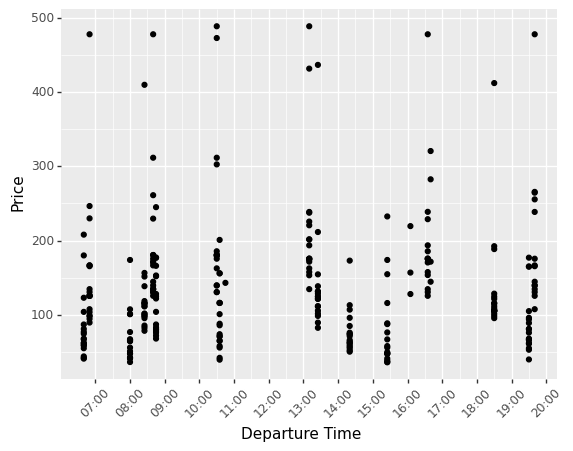

<ggplot: (8766502461534)>

In [96]:
price_plots = plt.ggplot(data=df,
           mapping=plt.aes(x='depFlight_departure', y='price_amount'))

price_plots + plt.geom_point() + plt.theme(axis_text_x = plt.element_text(angle=90)) + labs(x = "Departure Time", y = "Price") +\
plt.scale_x_datetime(breaks=date_breaks('1 hours'), labels=date_format('%H:%M')) + \
    plt.theme(axis_text_x = plt.element_text(angle=45)) + labs(x = "Departure Time", y = "Price")


In [97]:
df_mean = df.groupby('depFlight_departure')['price_amount'].mean().reset_index()
df_mean

,depFlight_departure,price_amount
0,1900-01-01 06:40:00,82.960556
1,1900-01-01 06:50:00,156.268333
2,1900-01-01 08:00:00,69.649444
3,1900-01-01 08:25:00,127.030556
4,1900-01-01 08:40:00,188.896111
5,1900-01-01 08:45:00,120.760556
6,1900-01-01 10:30:00,224.056000
7,1900-01-01 10:35:00,93.171667
8,1900-01-01 10:45:00,143.080000
9,1900-01-01 13:10:00,217.776111


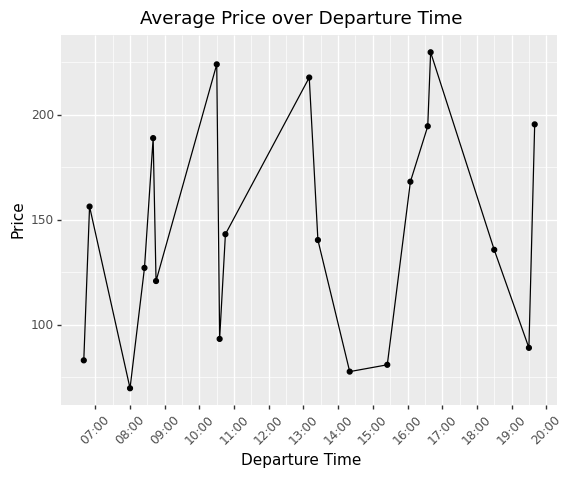

<ggplot: (8766431005528)>

In [98]:
price_plots = plt.ggplot(data=df_mean,
           mapping=plt.aes(x='depFlight_departure', y='price_amount'))

price_plots + plt.geom_point() + plt.geom_line() + plt.theme(axis_text_x = plt.element_text(angle=90)) + labs(x = "Departure Time", y = "Price", title = 'Average Price over Departure Time')+\
plt.scale_x_datetime(breaks=date_breaks('1 hours'), labels=date_format('%H:%M')) + \
    plt.theme(axis_text_x = plt.element_text(angle=45)) + labs(x = "Departure Time", y = "Price")

In [99]:
berlin = pd.read_csv("ds105 data/depFlight_0320/berlin_0320.csv")
berlin

,id,depFlight_id,depFlight_origin.name,depFlight_origin.displayCode,depFlight_destination.name,depFlight_destination.displayCode,depFlight_durationInMinutes,depFlight_departure,depFlight_arrival,depFlight_name,...,booking_agent,is_carrier,rating_status,rating,rating_breakdown.reliable_prices,rating_breakdown.clear_extra_fees,rating_breakdown.customer_service,rating_breakdown.ease_of_booking,rating_breakdown.other,price_amount
0,13465-2306021325--32480-0-9828-2306021605,13465-2306021325--32480-0-9828-2306021605,London City,LCY,Berlin Brandenburg,BER,100,2023-06-02T13:25:00,2023-06-02T16:05:00,British Airways,...,Worldairfares,False,available,3.21,2.750392,4.190264,4.950428,3.908032,2.035024,111.52
1,13542-2306020640--32356-0-9828-2306020940,13542-2306020640--32356-0-9828-2306020940,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-06-02T06:40:00,2023-06-02T09:40:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,103.99
2,13542-2306020845--32356-0-9828-2306021145,13542-2306020845--32356-0-9828-2306021145,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-06-02T08:45:00,2023-06-02T11:45:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,165.99
3,13465-2306020825--32480-0-9828-2306021110,13465-2306020825--32480-0-9828-2306021110,London City,LCY,Berlin Brandenburg,BER,105,2023-06-02T08:25:00,2023-06-02T11:10:00,British Airways,...,Worldairfares,False,available,3.21,2.750392,4.190264,4.950428,3.908032,2.035024,118.52
4,13554-2306020650--32480-0-9828-2306020940,13554-2306020650--32480-0-9828-2306020940,London Heathrow,LHR,Berlin Brandenburg,BER,110,2023-06-02T06:50:00,2023-06-02T09:40:00,British Airways,...,Worldairfares,False,available,3.21,2.750392,4.190264,4.950428,3.908032,2.035024,125.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,13771-2309291420--32356-0-9828-2309291710,13771-2309291420--32356-0-9828-2309291710,London Luton,LTN,Berlin Brandenburg,BER,110,2023-09-29T14:20:00,2023-09-29T17:10:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,63.99
282,13542-2309290640--32356-0-9828-2309290940,13542-2309290640--32356-0-9828-2309290940,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-09-29T06:40:00,2023-09-29T09:40:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,54.99
283,13542-2309290845--32356-0-9828-2309291145,13542-2309290845--32356-0-9828-2309291145,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-09-29T08:45:00,2023-09-29T11:45:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,67.99
284,13542-2309291930--32356-0-9828-2309292230,13542-2309291930--32356-0-9828-2309292230,London Gatwick,LGW,Berlin Brandenburg,BER,120,2023-09-29T19:30:00,2023-09-29T22:30:00,easyJet,...,easyJet,True,available,4.58,4.788856,4.773088,5.000000,4.717504,4.027796,54.99


In [100]:
berlin = berlin[['depFlight_departure','depFlight_origin.name', 'price_amount']]
berlin.sort_values('depFlight_origin.name', inplace = True)


/var/folders/vk/pkb0yrxj4txfy4sf03q5d0h40000gp/T/ipykernel_53557/3680807534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [101]:
berlin_month = berlin.copy()
berlin_month['depFlight_origin.name'] = berlin_month['depFlight_origin.name'].str.replace(' ', '')
berlin_month

,depFlight_departure,depFlight_origin.name,price_amount
0,2023-06-02T13:25:00,LondonCity,111.52
253,2023-09-15T18:30:00,LondonCity,101.52
251,2023-09-15T13:25:00,LondonCity,89.52
37,2023-06-16T13:25:00,LondonCity,124.52
180,2023-08-18T13:25:00,LondonCity,111.52
...,...,...,...
215,2023-09-01T15:25:00,LondonStansted,38.40
252,2023-09-15T10:35:00,LondonStansted,73.90
86,2023-07-07T15:25:00,LondonStansted,76.29
257,2023-09-22T15:25:00,LondonStansted,173.90


In [102]:
print(berlin_month['depFlight_origin.name'].unique())

['LondonCity' 'LondonGatwick' 'LondonHeathrow' 'LondonLuton'
 'LondonStansted']


In [103]:
berlin_month['departure month'] = pd.DatetimeIndex(berlin_month['depFlight_departure']).month
berlin_month.drop(['depFlight_departure'], axis = 1, inplace = True)
berlin_month.rename(columns = {'depFlight_origin.name': 'airport', 'price_amount': 'price'}, inplace = True)

In [104]:
grouped = berlin_month.groupby('airport')
dfs = {name: group for name, group in grouped}

In [105]:
for name, df in dfs.items():
    var_name = f"{name}_data"
    exec(f"{var_name} = df")

In [106]:
LondonGatwick_data

,airport,price,departure month
178,LondonGatwick,82.99,8
93,LondonGatwick,176.99,7
173,LondonGatwick,95.99,8
176,LondonGatwick,60.99,8
109,LondonGatwick,176.99,7
133,LondonGatwick,86.99,7
85,LondonGatwick,164.99,7
152,LondonGatwick,151.99,8
83,LondonGatwick,80.99,7
216,LondonGatwick,71.99,9


In [107]:
LondonStansted_data

,airport,price,departure month
99,LondonStansted,65.80,7
209,LondonStansted,41.20,9
26,LondonStansted,47.90,6
153,LondonStansted,66.90,8
5,LondonStansted,70.70,6
166,LondonStansted,49.70,8
22,LondonStansted,71.40,6
264,LondonStansted,173.90,9
165,LondonStansted,88.00,8
89,LondonStansted,155.90,7


In [108]:
mean_prices = {}

for airport in berlin_month['airport'].unique():
    data = globals()[airport+'_data']
    mean_prices[airport] = data.groupby('departure month')['price'].mean().tolist()

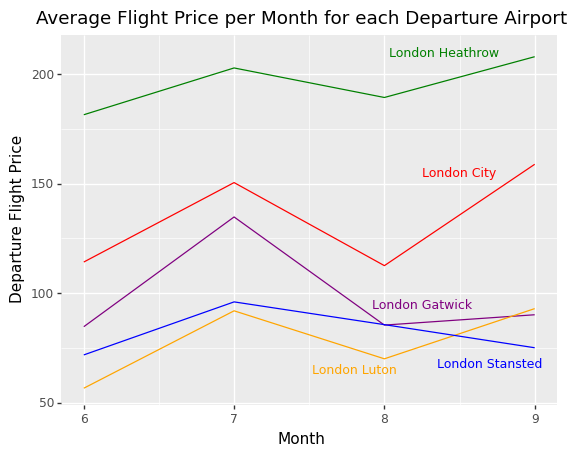

<ggplot: (8766448558544)>

In [109]:
all_plots = pd.DataFrame({'x': range(6, 10)})
for airport in mean_prices:
    all_plots[airport] = mean_prices[airport]

colors = {'LondonCity': 'red', 'LondonGatwick': 'purple', 'LondonHeathrow': 'green', 'LondonLuton': 'orange', 'LondonStansted': 'blue'}

LondonCity_plots = ggplot(all_plots, aes(x='x'))
for airport in mean_prices:
    LondonCity_plots += geom_line(aes(y=airport), color=colors[airport])

LondonCity_plots + labs(x="Month", y="Departure Flight Price", title='Average Flight Price per Month for each Departure Airport') +\
      annotate("text", x=8.4, y=210, label="London Heathrow", size=9, color=colors['LondonHeathrow']) + \
        annotate("text", x=8.5, y=155, label="London City", size=9, color=colors['LondonCity']) + \
        annotate("text", x=8.25, y=95, label="London Gatwick", size=9, color=colors['LondonGatwick']) + \
        annotate("text", x=7.8, y=65, label="London Luton", size=9, color=colors['LondonLuton']) + \
        annotate("text", x=8.7, y=68, label="London Stansted", size=9, color=colors['LondonStansted'])